In [1]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os.path
import os

In [2]:
# df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")

# print(df['DK3619Code'])
# dkcode_list = list(set(df['DK3619Code'].to_list()))
# dkcode_list.sort()
# id2dkcode = enumerate(dkcode_list)
# id2dkcode = dict(id2dkcode)

# dkcode2id = {}
# for i in id2dkcode.items():
#     dkcode2id[i[1]] = i[0]


# print(dict(dkcode2id))

# # Export the dkcode_list to a CSV file
# dkcode_df = pd.DataFrame(dkcode_list, columns=['DK3619Code'])
# dkcode_df.to_csv('dkcode_list.csv', index=False)

# ### Mapping data to numberic
# # df['DK3619Code'] = df['DK3619Code'].map(dkcode2id)

# ### Season mapping 

# seasons_mapping = {
#     'Spring': 0,
#     'Summer': 1,
#     'Autumn': 2,
#     'Winter': 3
# }

# df['season'] = df['season'].map(seasons_mapping)

# # Convert holiday to binary indicator
# df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# # Xóa tất cả các hàng có giá trị null
# df_cleaned = df.dropna()

## With Lag_24

In [3]:
# columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week', 
#            'month', 'year', 'day_of_year', 'day_of_month', 
#            'season', 'holiday', 'lag_24', 'Consumption_MWh']

# # Split function
# def split_train_test(df, split_time):
#     df_train = df.loc[df['HourDK'] < split_time]
#     df_test = df.loc[df['HourDK'] >= split_time]
#     return df_train, df_test

# def compute_predictions_df(model, X, y):
#     y_pred = model.predict(X)
#     df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
#     df["squared_error"] = (df["actual"] - df["prediction"])**2
#     return df

In [4]:
# #all_dkcode_trainings
# if not os.path.exists("/kaggle/working/Checkpoints/"):
#     os.makedirs("/kaggle/working/Checkpoints/")
    
# #all_dkcode_trainings
# if not os.path.exists("/kaggle/working/Prediction/"):
#     os.makedirs("/kaggle/working/Prediction/")
    
# # Initialize an empty DataFrame to store the performance metrics
# performance_df = pd.DataFrame(columns=['DK3619Code', 'MAE', 'MSE', 'RMSE', 'R2'])

# for i in dkcode_list:
#     if os.path.exists("/kaggle/working/Checkpoints/" + i + "_RandomForestRegressor_model.pkl"):
#         continue
#     print('Training RandomForestRegressor model with DKCode: ', i)
#     df_filter = df[df['DK3619Code'] == i]
#     df_corr = df_filter[columns]
    
#     df_corr['lag_24'] = df_corr['lag_24'].fillna(0)

#     df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
#     df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

#     df_corr = df_corr.sort_values(by='HourDK')

#     # Split the data
#     split_time = pd.Timestamp("2020-02-01")
#     df_train, df_temp = split_train_test(df_corr, split_time)
#     split_time_valid = pd.Timestamp("2020-03-01")
#     df_valid, df_test = split_train_test(df_temp, split_time_valid)
    
#     test_time = df_test[['HourDK']]
    
#     # Drop datetime columns after splitting
#     df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
#     df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
#     df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

#     # Define target and features
#     y_train = df_train[['Consumption_MWh']]  # Target variable
#     x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

#     y_valid = df_valid[['Consumption_MWh']]
#     x_valid = df_valid.drop(columns=['Consumption_MWh'])

#     y_test = df_test[['Consumption_MWh']]
#     x_test = df_test.drop(columns=['Consumption_MWh'])

#     # Khởi tạo và fit model
#     model = RandomForestRegressor(n_estimators=100, random_state=10)
#     model.fit(x_train, y_train)

#     # Lưu model
#     joblib.dump(model, "/kaggle/working/Checkpoints/" + i + "_RandomForestRegressor_model.pkl")
#     # Load model from file
#     model = joblib.load("/kaggle/working/Checkpoints/" + i + "_RandomForestRegressor_model.pkl")

#     y_pred = model.predict(x_test)
    
#     # Calculate evaluation metrics
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)

#     print(f'Mean Absolute Error (MAE): {mae}')
#     print(f'Mean Squared Error (MSE): {mse}')
#     print(f'Root Mean Squared Error (RMSE): {rmse}')
#     print(f'R-squared (R²): {r2}')

#     # Append metrics to the performance DataFrame
#     performance_df = pd.concat([performance_df, pd.DataFrame({
#         'DK3619Code': [i],
#         'MAE': [mae],
#         'MSE': [mse],
#         'RMSE': [rmse],
#         'R2': [r2]
#     })], ignore_index=True)
    
#     print(performance_df)
    
#     pred_df = compute_predictions_df(model, x_test, y_test)

#     # Merge data into df_corr
#     pred_df = pd.merge(test_time, pred_df, left_index=True, right_index=True)
#     pred_df = pred_df[['HourDK', 'actual', 'prediction', 'squared_error']]
    
#     pred_df.to_csv("/kaggle/working/Prediction/" + i + "_DF_Prediction.csv", index=False)
    
#     plt.figure(figsize=(12, 5))
#     start = pred_df['HourDK'].min()
#     end = pred_df['HourDK'].max()
#     plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
#     plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
#     plt.title("Predictions of " + i + " DKCode on Test set")
#     plt.xlabel('Index')
#     plt.ylabel('MW')
#     plt.legend()
#     plt.grid()
#     plt.show()

# # Save performance DataFrame to CSV
# performance_df.to_csv("/kaggle/working/Performance_Metrics_WithLag.csv", index=False)

# # Display the performance DataFrame
# print(performance_df)

## Without Lag_24

In [5]:
df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")

print(df['DK3619Code'])
dkcode_list = list(set(df['DK3619Code'].to_list()))
dkcode_list.sort()
id2dkcode = enumerate(dkcode_list)
id2dkcode = dict(id2dkcode)

dkcode2id = {}
for i in id2dkcode.items():
    dkcode2id[i[1]] = i[0]


print(dict(dkcode2id))

# Export the dkcode_list to a CSV file
dkcode_df = pd.DataFrame(dkcode_list, columns=['DK3619Code'])
dkcode_df.to_csv('dkcode_list.csv', index=False)

### Mapping data to numberic
# df['DK3619Code'] = df['DK3619Code'].map(dkcode2id)

### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()

0                 A_A
1                C_CA
2                C_CC
3          C_CE_CF_CD
4                C_CG
              ...    
3323742          Q_QB
3323743           R_R
3323744           S_S
3323745    C_CE_CF_CD
3323746          M_MA
Name: DK3619Code, Length: 3323747, dtype: object
{'A_A': 0, 'C_CA': 1, 'C_CC': 2, 'C_CE_CF_CD': 3, 'C_CG': 4, 'C_CH': 5, 'C_CI': 6, 'C_CJ': 7, 'C_CK': 8, 'C_CL': 9, 'C_CM_CB': 10, 'D_D': 11, 'E_E': 12, 'F_F': 13, 'G_G': 14, 'H_H': 15, 'I_I': 16, 'J_JA': 17, 'J_JB_JC': 18, 'K_K': 19, 'L_L': 20, 'M_MA': 21, 'M_MB': 22, 'M_MC': 23, 'N_N': 24, 'O_O': 25, 'PR_PR': 26, 'P_P': 27, 'Q_QA': 28, 'Q_QB': 29, 'R_R': 30, 'S_S': 31}


In [6]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week', 
           'month', 'year', 'day_of_year', 'day_of_month', 
           'season', 'holiday', 'Consumption_MWh']

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

Training RandomForestRegressor model with DKCode:  A_A


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 23.351016230309938
Mean Squared Error (MSE): 1030.2703568395568
Root Mean Squared Error (RMSE): 32.09782479919094
R-squared (R²): 0.22340415128841928
  DK3619Code        MAE          MSE       RMSE        R2
0        A_A  23.351016  1030.270357  32.097825  0.223404


/tmp/ipykernel_23/831907902.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df = pd.concat([performance_df, pd.DataFrame({


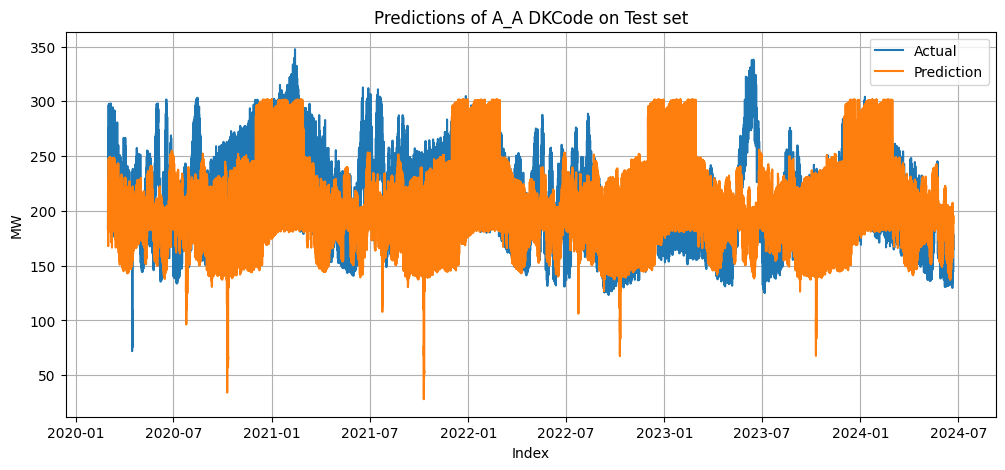

Training RandomForestRegressor model with DKCode:  C_CA


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 16.180768289551796
Mean Squared Error (MSE): 483.6257644156793
Root Mean Squared Error (RMSE): 21.99149300106019
R-squared (R²): 0.7949193862570468
  DK3619Code        MAE          MSE       RMSE        R2
0        A_A  23.351016  1030.270357  32.097825  0.223404
1       C_CA  16.180768   483.625764  21.991493  0.794919


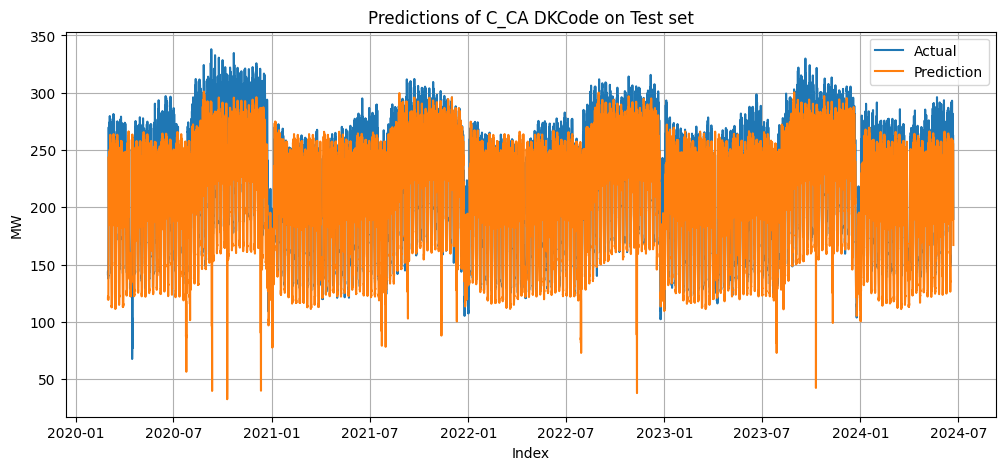

Training RandomForestRegressor model with DKCode:  C_CC


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 4.145751278420332
Mean Squared Error (MSE): 31.750820144447594
Root Mean Squared Error (RMSE): 5.6347866103737765
R-squared (R²): 0.9068747657749051
  DK3619Code        MAE          MSE       RMSE        R2
0        A_A  23.351016  1030.270357  32.097825  0.223404
1       C_CA  16.180768   483.625764  21.991493  0.794919
2       C_CC   4.145751    31.750820   5.634787  0.906875


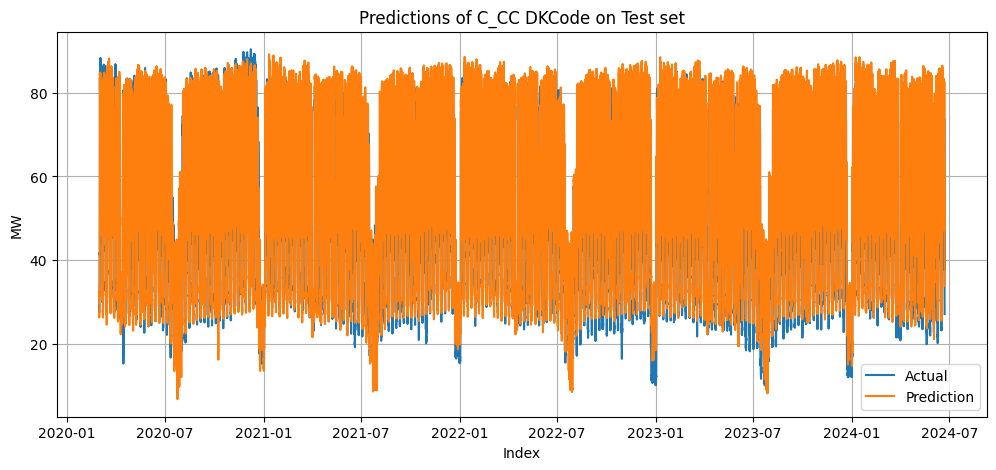

Training RandomForestRegressor model with DKCode:  C_CE_CF_CD


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 20.769795347970938
Mean Squared Error (MSE): 600.0291440879581
Root Mean Squared Error (RMSE): 24.49549232181215
R-squared (R²): -1.848957161343669
   DK3619Code        MAE          MSE       RMSE        R2
0         A_A  23.351016  1030.270357  32.097825  0.223404
1        C_CA  16.180768   483.625764  21.991493  0.794919
2        C_CC   4.145751    31.750820   5.634787  0.906875
3  C_CE_CF_CD  20.769795   600.029144  24.495492 -1.848957


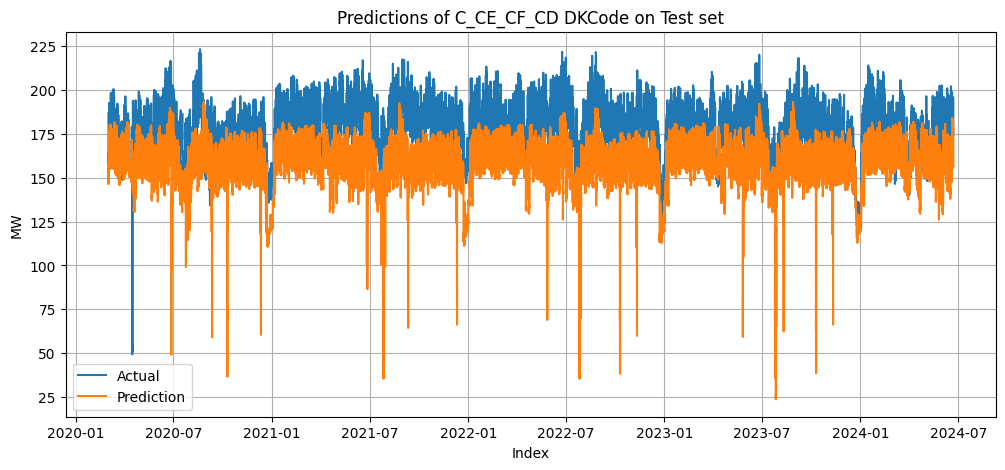

Training RandomForestRegressor model with DKCode:  C_CG


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 12.493240852093184
Mean Squared Error (MSE): 237.4580187722765
Root Mean Squared Error (RMSE): 15.409672896342624
R-squared (R²): 0.7577890344305214
   DK3619Code        MAE          MSE       RMSE        R2
0         A_A  23.351016  1030.270357  32.097825  0.223404
1        C_CA  16.180768   483.625764  21.991493  0.794919
2        C_CC   4.145751    31.750820   5.634787  0.906875
3  C_CE_CF_CD  20.769795   600.029144  24.495492 -1.848957
4        C_CG  12.493241   237.458019  15.409673  0.757789


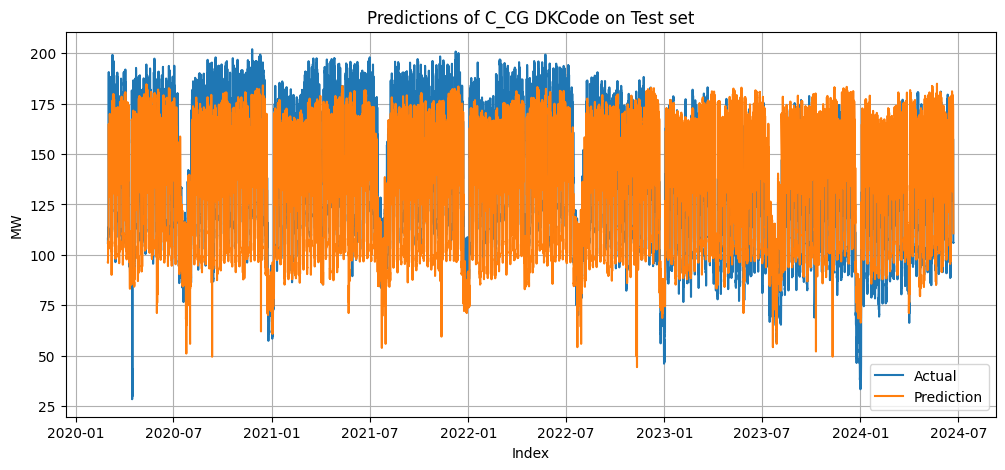

Training RandomForestRegressor model with DKCode:  C_CH


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 7.6720611411154644
Mean Squared Error (MSE): 148.2248761665095
Root Mean Squared Error (RMSE): 12.174763905986412
R-squared (R²): 0.9271921196387133
   DK3619Code        MAE          MSE       RMSE        R2
0         A_A  23.351016  1030.270357  32.097825  0.223404
1        C_CA  16.180768   483.625764  21.991493  0.794919
2        C_CC   4.145751    31.750820   5.634787  0.906875
3  C_CE_CF_CD  20.769795   600.029144  24.495492 -1.848957
4        C_CG  12.493241   237.458019  15.409673  0.757789
5        C_CH   7.672061   148.224876  12.174764  0.927192


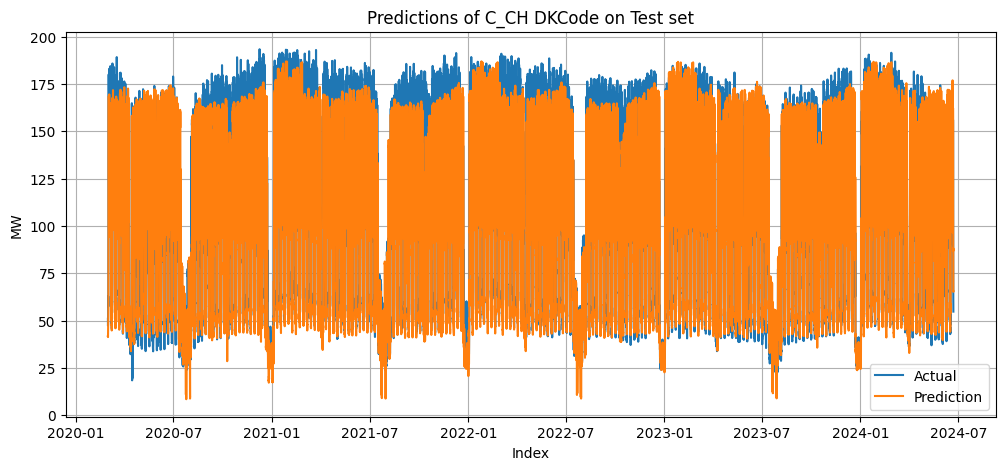

Training RandomForestRegressor model with DKCode:  C_CI


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 0.6362522413302402
Mean Squared Error (MSE): 0.8302345334676502
Root Mean Squared Error (RMSE): 0.9111720657854092
R-squared (R²): 0.887732978018263
   DK3619Code        MAE          MSE       RMSE        R2
0         A_A  23.351016  1030.270357  32.097825  0.223404
1        C_CA  16.180768   483.625764  21.991493  0.794919
2        C_CC   4.145751    31.750820   5.634787  0.906875
3  C_CE_CF_CD  20.769795   600.029144  24.495492 -1.848957
4        C_CG  12.493241   237.458019  15.409673  0.757789
5        C_CH   7.672061   148.224876  12.174764  0.927192
6        C_CI   0.636252     0.830235   0.911172  0.887733


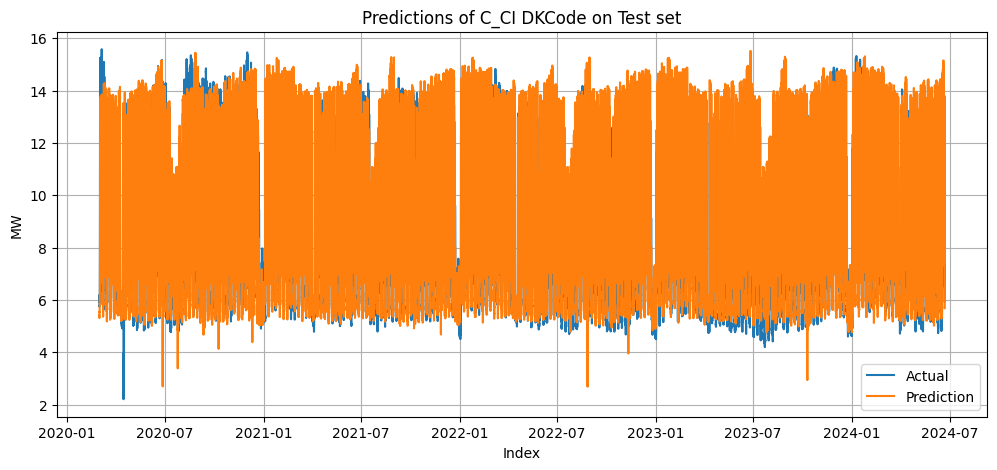

Training RandomForestRegressor model with DKCode:  C_CJ


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 0.7120815500185442
Mean Squared Error (MSE): 1.0460955759424049
Root Mean Squared Error (RMSE): 1.0227881383465516
R-squared (R²): 0.9343404575149304
   DK3619Code        MAE          MSE       RMSE        R2
0         A_A  23.351016  1030.270357  32.097825  0.223404
1        C_CA  16.180768   483.625764  21.991493  0.794919
2        C_CC   4.145751    31.750820   5.634787  0.906875
3  C_CE_CF_CD  20.769795   600.029144  24.495492 -1.848957
4        C_CG  12.493241   237.458019  15.409673  0.757789
5        C_CH   7.672061   148.224876  12.174764  0.927192
6        C_CI   0.636252     0.830235   0.911172  0.887733
7        C_CJ   0.712082     1.046096   1.022788  0.934340


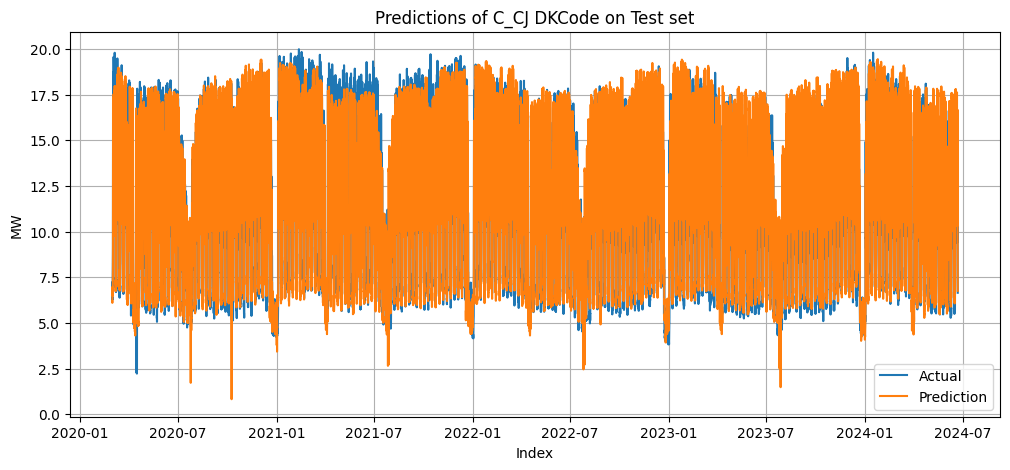

Training RandomForestRegressor model with DKCode:  C_CK


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 3.9679250576258203
Mean Squared Error (MSE): 34.47580890862456
Root Mean Squared Error (RMSE): 5.871610418669188
R-squared (R²): 0.9286966203831937
   DK3619Code        MAE          MSE       RMSE        R2
0         A_A  23.351016  1030.270357  32.097825  0.223404
1        C_CA  16.180768   483.625764  21.991493  0.794919
2        C_CC   4.145751    31.750820   5.634787  0.906875
3  C_CE_CF_CD  20.769795   600.029144  24.495492 -1.848957
4        C_CG  12.493241   237.458019  15.409673  0.757789
5        C_CH   7.672061   148.224876  12.174764  0.927192
6        C_CI   0.636252     0.830235   0.911172  0.887733
7        C_CJ   0.712082     1.046096   1.022788  0.934340
8        C_CK   3.967925    34.475809   5.871610  0.928697


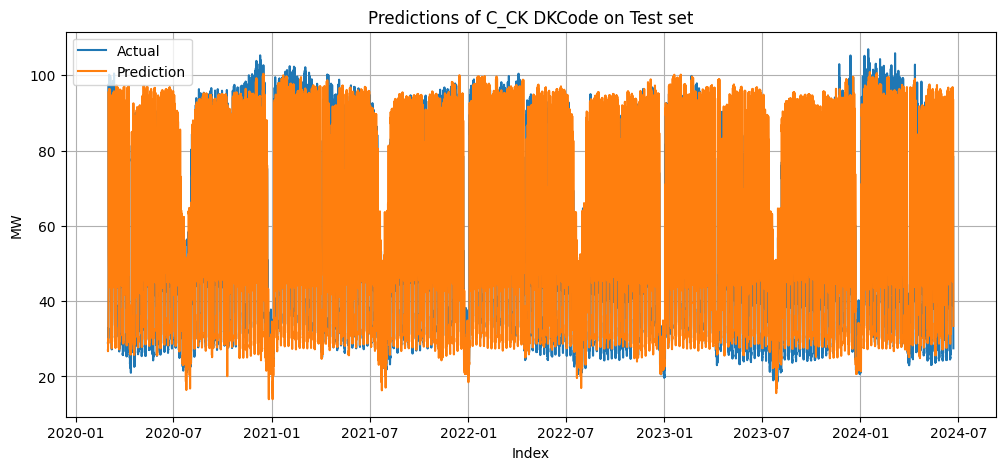

Training RandomForestRegressor model with DKCode:  C_CL


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 0.8117768543739244
Mean Squared Error (MSE): 1.3035060977839301
Root Mean Squared Error (RMSE): 1.141711915407705
R-squared (R²): 0.9067412640620135
   DK3619Code        MAE          MSE       RMSE        R2
0         A_A  23.351016  1030.270357  32.097825  0.223404
1        C_CA  16.180768   483.625764  21.991493  0.794919
2        C_CC   4.145751    31.750820   5.634787  0.906875
3  C_CE_CF_CD  20.769795   600.029144  24.495492 -1.848957
4        C_CG  12.493241   237.458019  15.409673  0.757789
5        C_CH   7.672061   148.224876  12.174764  0.927192
6        C_CI   0.636252     0.830235   0.911172  0.887733
7        C_CJ   0.712082     1.046096   1.022788  0.934340
8        C_CK   3.967925    34.475809   5.871610  0.928697
9        C_CL   0.811777     1.303506   1.141712  0.906741


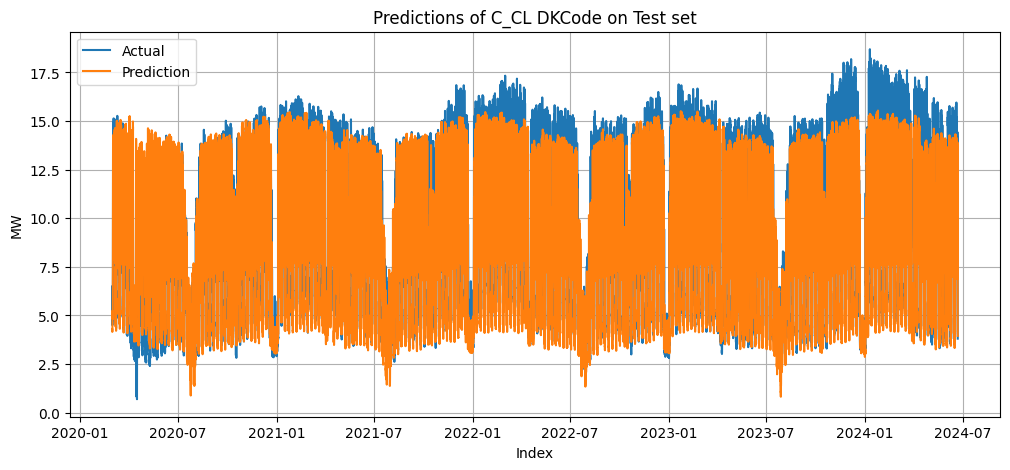

Training RandomForestRegressor model with DKCode:  C_CM_CB


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 3.2905165186868834
Mean Squared Error (MSE): 18.9628477502035
Root Mean Squared Error (RMSE): 4.354635202884795
R-squared (R²): 0.9322808484537004
    DK3619Code        MAE          MSE       RMSE        R2
0          A_A  23.351016  1030.270357  32.097825  0.223404
1         C_CA  16.180768   483.625764  21.991493  0.794919
2         C_CC   4.145751    31.750820   5.634787  0.906875
3   C_CE_CF_CD  20.769795   600.029144  24.495492 -1.848957
4         C_CG  12.493241   237.458019  15.409673  0.757789
5         C_CH   7.672061   148.224876  12.174764  0.927192
6         C_CI   0.636252     0.830235   0.911172  0.887733
7         C_CJ   0.712082     1.046096   1.022788  0.934340
8         C_CK   3.967925    34.475809   5.871610  0.928697
9         C_CL   0.811777     1.303506   1.141712  0.906741
10     C_CM_CB   3.290517    18.962848   4.354635  0.932281


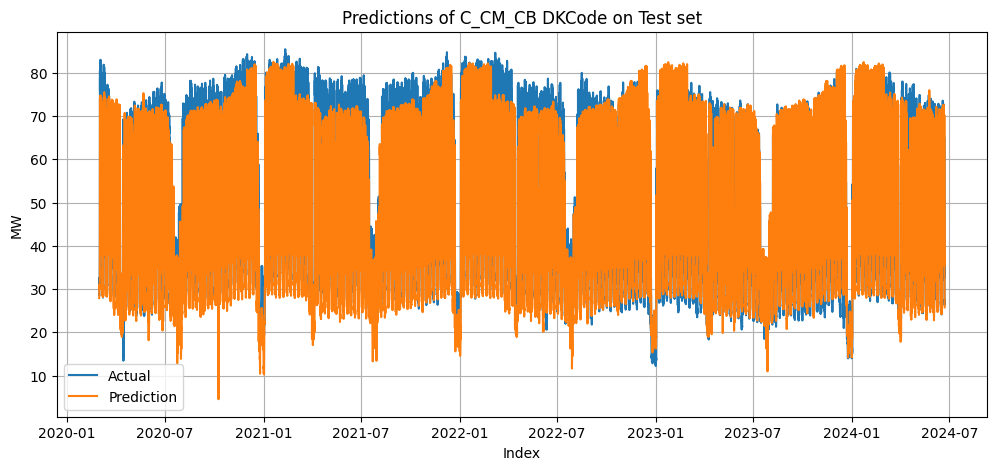

Training RandomForestRegressor model with DKCode:  D_D


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 146.03831889771115
Mean Squared Error (MSE): 56804.81186553993
Root Mean Squared Error (RMSE): 238.33760061211476
R-squared (R²): -0.18989943313686597
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899


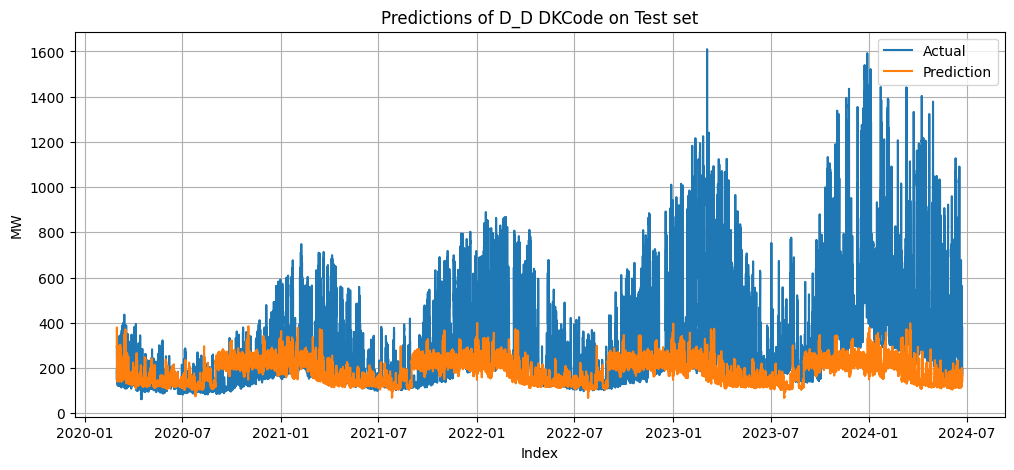

Training RandomForestRegressor model with DKCode:  E_E


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 10.367684781503245
Mean Squared Error (MSE): 201.43718833688413
Root Mean Squared Error (RMSE): 14.192856947665051
R-squared (R²): 0.3257790368772132
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12  

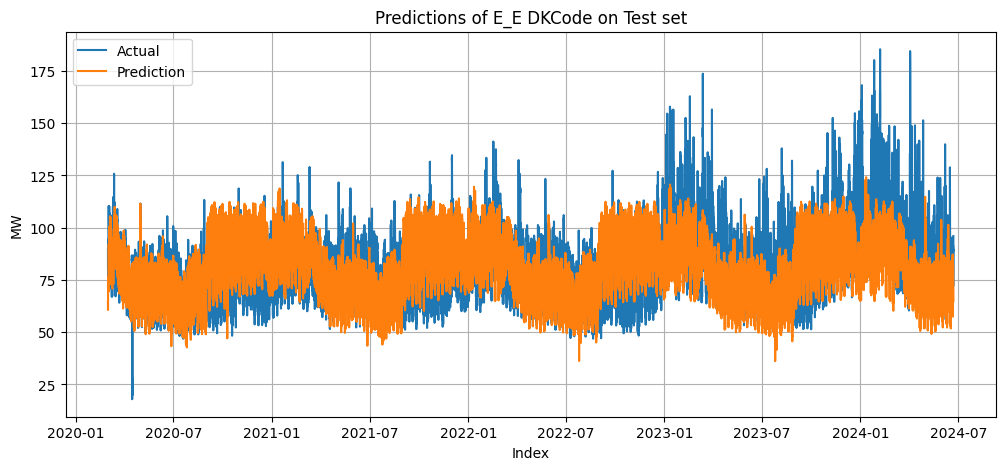

Training RandomForestRegressor model with DKCode:  F_F


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 8.418836011679682
Mean Squared Error (MSE): 102.80273537459223
Root Mean Squared Error (RMSE): 10.139168376873531
R-squared (R²): 0.5440987471801247
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12   

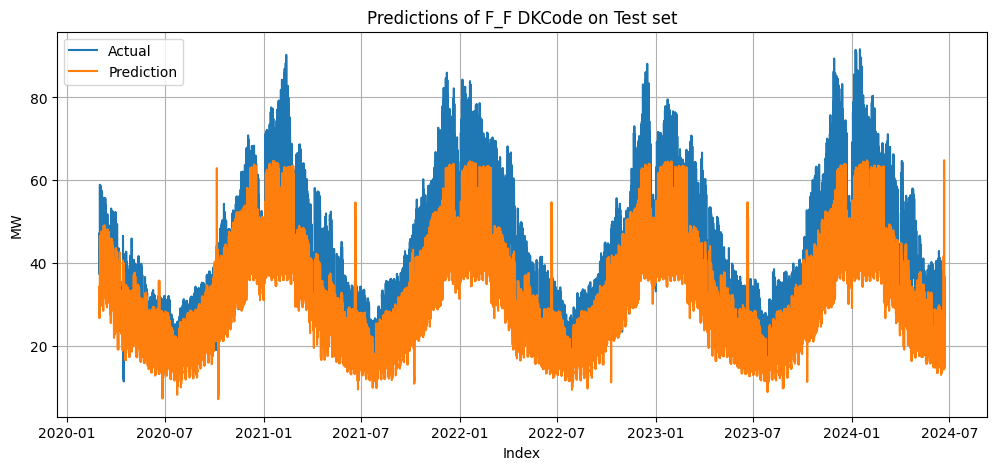

Training RandomForestRegressor model with DKCode:  G_G


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 15.937360554298722
Mean Squared Error (MSE): 481.6177864849758
Root Mean Squared Error (RMSE): 21.945791999492197
R-squared (R²): 0.9462207661028674
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12   

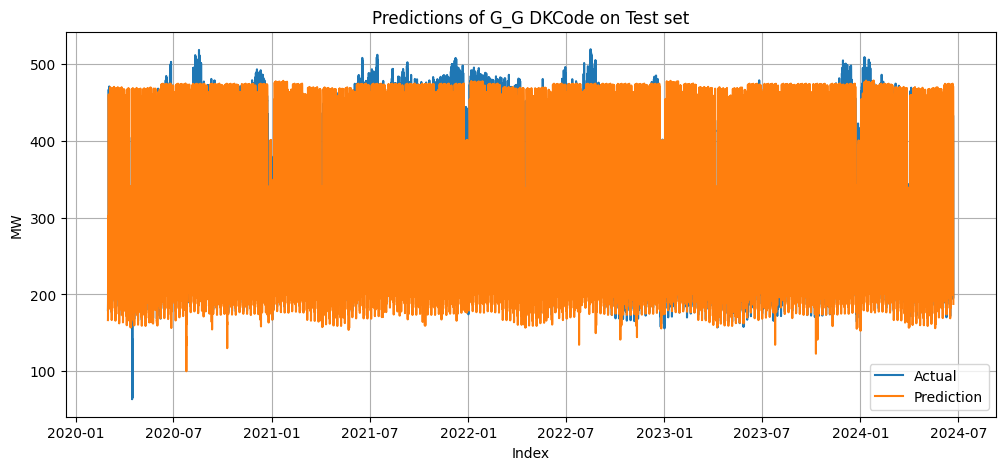

Training RandomForestRegressor model with DKCode:  H_H


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 14.478118393928007
Mean Squared Error (MSE): 356.98262383216655
Root Mean Squared Error (RMSE): 18.89398379993395
R-squared (R²): 0.48213456217549644
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12  

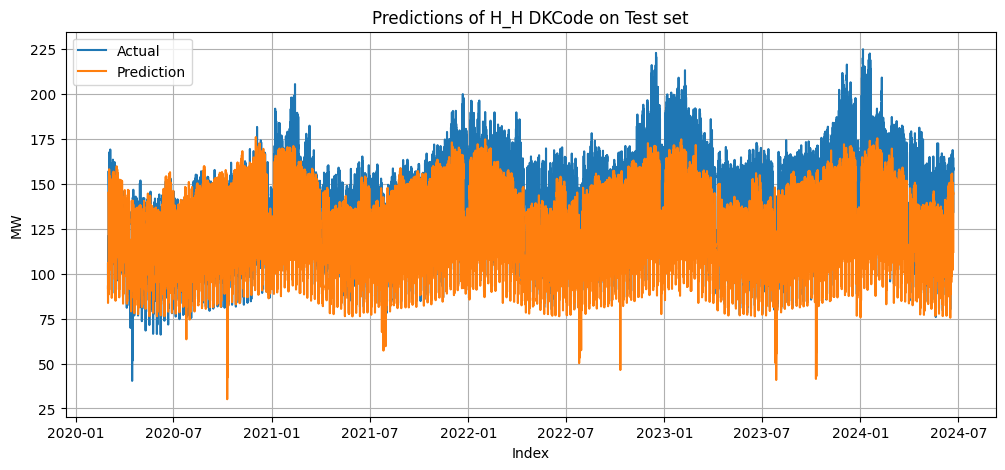

Training RandomForestRegressor model with DKCode:  I_I


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 11.144394270516017
Mean Squared Error (MSE): 211.45838243011593
Root Mean Squared Error (RMSE): 14.541608660327643
R-squared (R²): 0.756933602414507
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12   

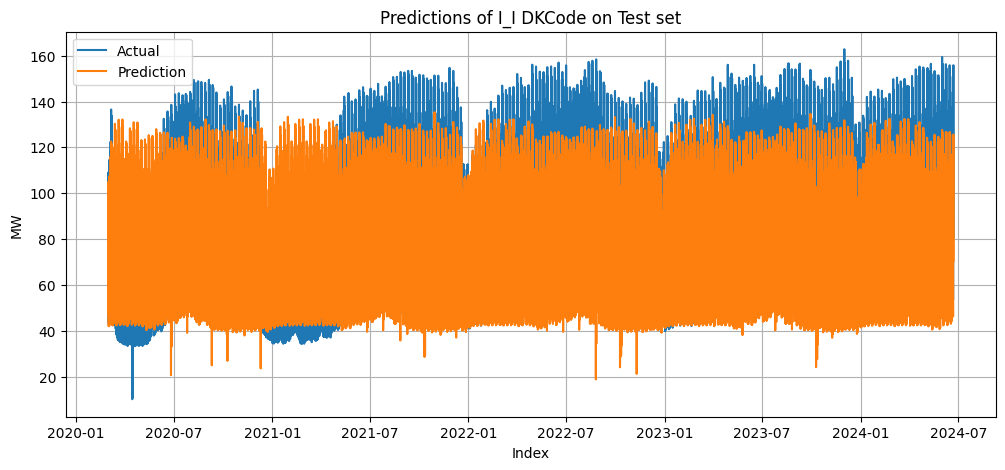

Training RandomForestRegressor model with DKCode:  J_JA


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 0.7870290383345777
Mean Squared Error (MSE): 1.2200418506744648
Root Mean Squared Error (RMSE): 1.1045550464664333
R-squared (R²): 0.7809126642668823
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12  

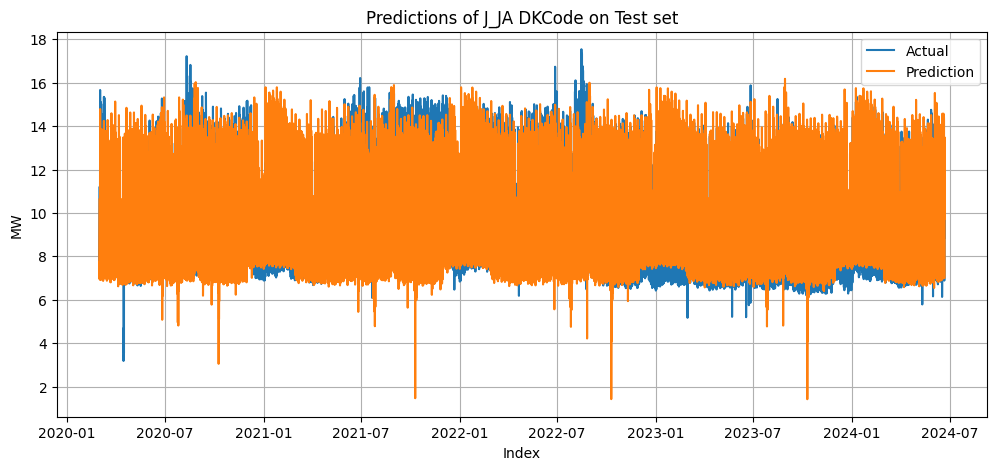

Training RandomForestRegressor model with DKCode:  J_JB_JC


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 44.288569441062954
Mean Squared Error (MSE): 2227.995518530997
Root Mean Squared Error (RMSE): 47.20164741331595
R-squared (R²): -7.717675401887574
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12    

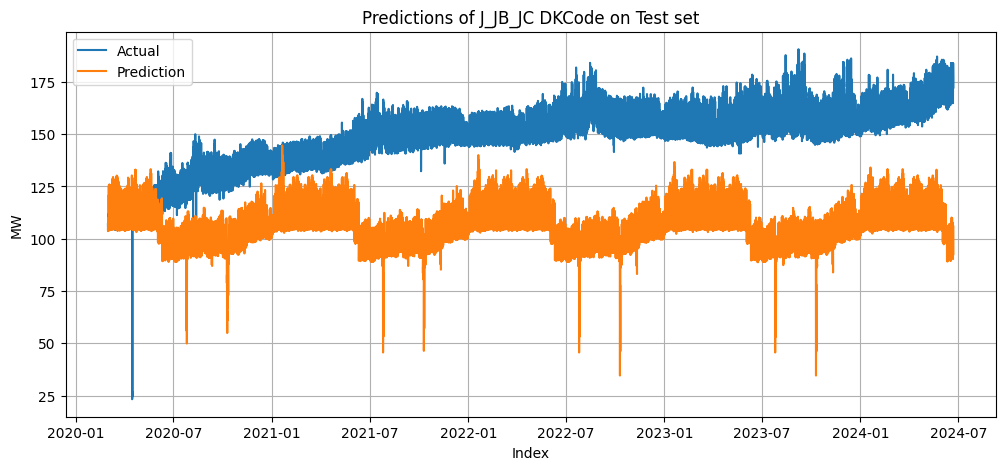

Training RandomForestRegressor model with DKCode:  K_K


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 2.5370143553831372
Mean Squared Error (MSE): 10.758720551017449
Root Mean Squared Error (RMSE): 3.280048864120388
R-squared (R²): 0.8701573479160167
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12   

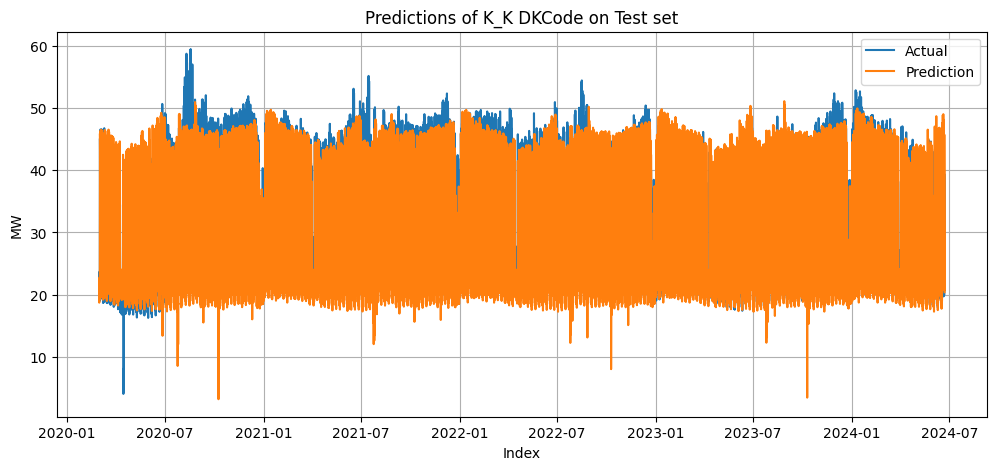

Training RandomForestRegressor model with DKCode:  L_L


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 18.441176819022235
Mean Squared Error (MSE): 465.51326578601675
Root Mean Squared Error (RMSE): 21.575756436009765
R-squared (R²): 0.6606651787234541
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12  

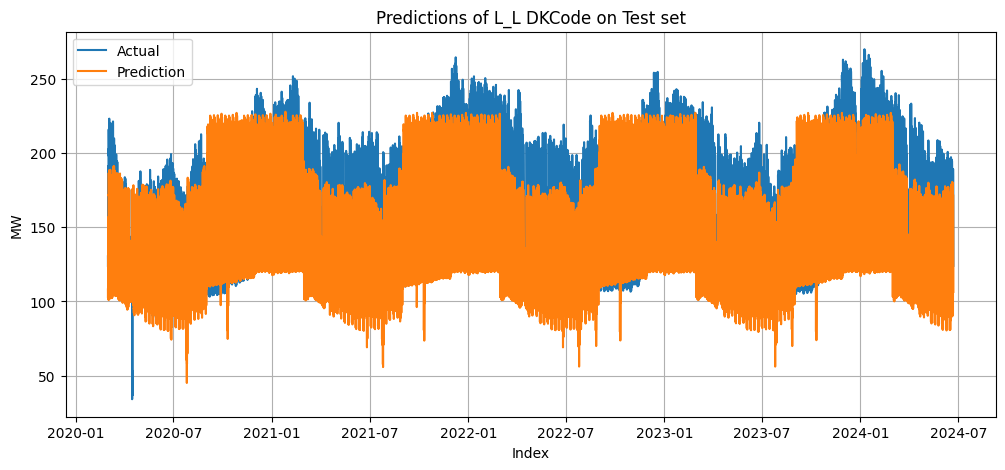

Training RandomForestRegressor model with DKCode:  M_MA


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 4.317260818256129
Mean Squared Error (MSE): 32.44764015185336
Root Mean Squared Error (RMSE): 5.696283011916925
R-squared (R²): 0.6356122442936327
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12     

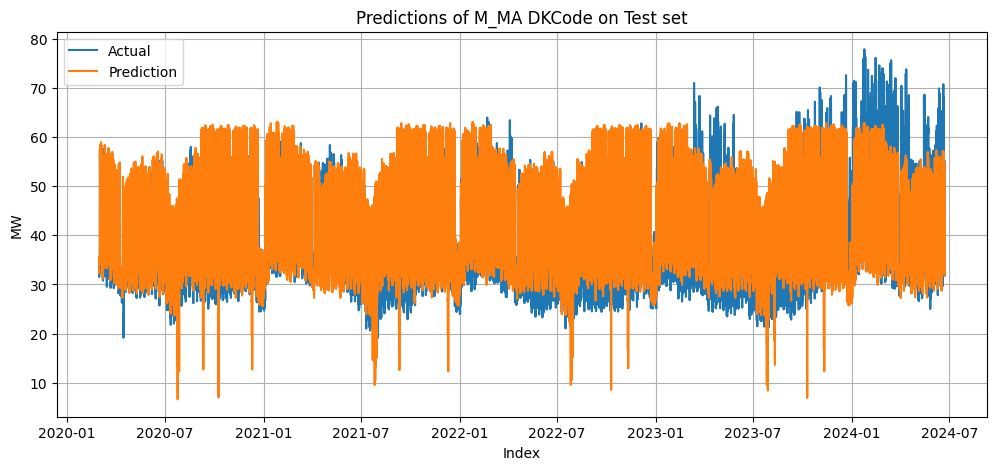

Training RandomForestRegressor model with DKCode:  M_MB


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 1.6694962323710392
Mean Squared Error (MSE): 5.785496953250471
Root Mean Squared Error (RMSE): 2.4053059999198587
R-squared (R²): 0.5890196391134264
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12   

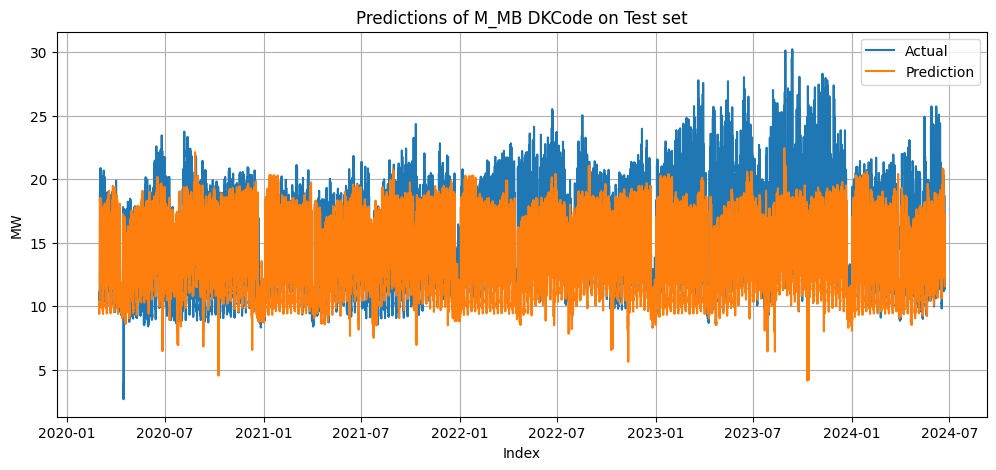

Training RandomForestRegressor model with DKCode:  M_MC


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 0.5103721308609839
Mean Squared Error (MSE): 1.6145666902435598
Root Mean Squared Error (RMSE): 1.2706560078335756
R-squared (R²): 0.5254691004571013
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12  

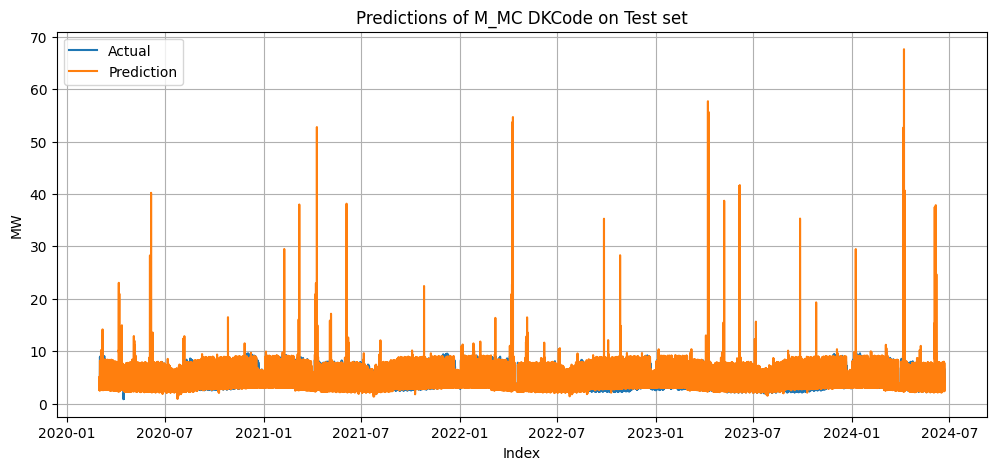

Training RandomForestRegressor model with DKCode:  N_N


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 4.4265345903965585
Mean Squared Error (MSE): 36.687340031961625
Root Mean Squared Error (RMSE): 6.057007514603364
R-squared (R²): 0.39960179941296126
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12  

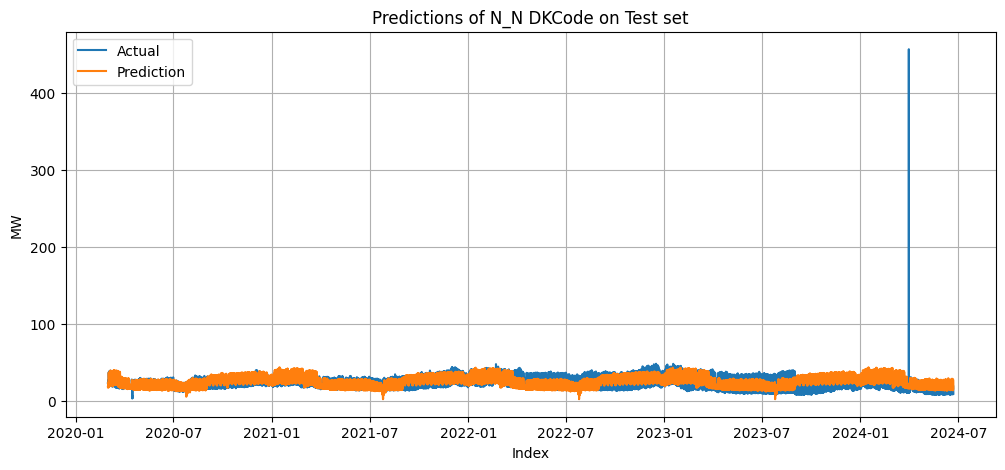

Training RandomForestRegressor model with DKCode:  O_O


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 10.156310821730738
Mean Squared Error (MSE): 242.9863132323473
Root Mean Squared Error (RMSE): 15.588018258660954
R-squared (R²): 0.9029935318591524
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12   

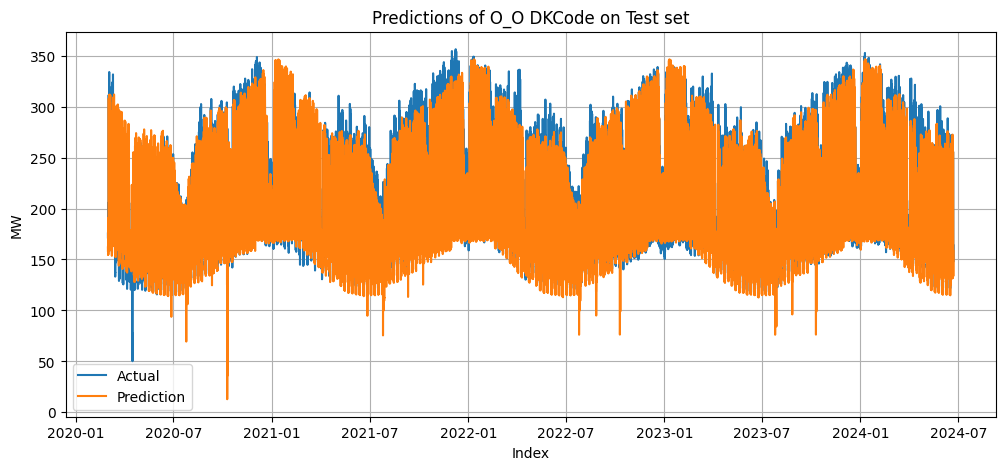

Training RandomForestRegressor model with DKCode:  PR_PR


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 179.45258956135137
Mean Squared Error (MSE): 49152.72732403041
Root Mean Squared Error (RMSE): 221.70414367807928
R-squared (R²): 0.5722404461910999
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12   

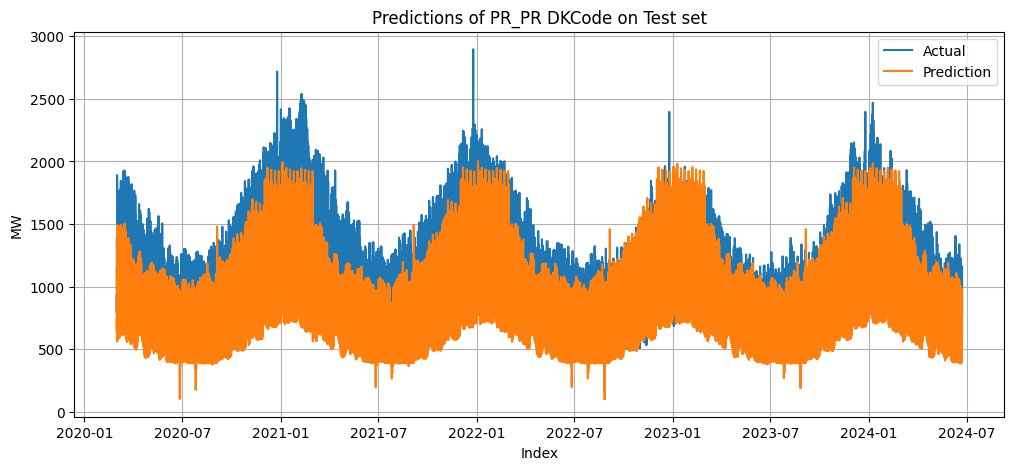

Training RandomForestRegressor model with DKCode:  P_P


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 4.2758528296270715
Mean Squared Error (MSE): 65.59264386889653
Root Mean Squared Error (RMSE): 8.098928563019712
R-squared (R²): 0.8472889218058179
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12    

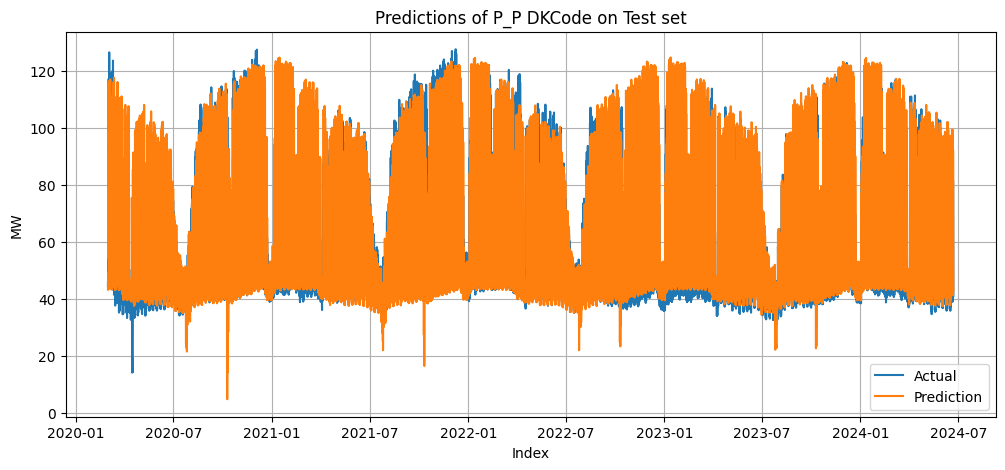

Training RandomForestRegressor model with DKCode:  Q_QA


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 1.047841415674582
Mean Squared Error (MSE): 1.7740533444663453
Root Mean Squared Error (RMSE): 1.3319359385745042
R-squared (R²): 0.89768331818932
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12     

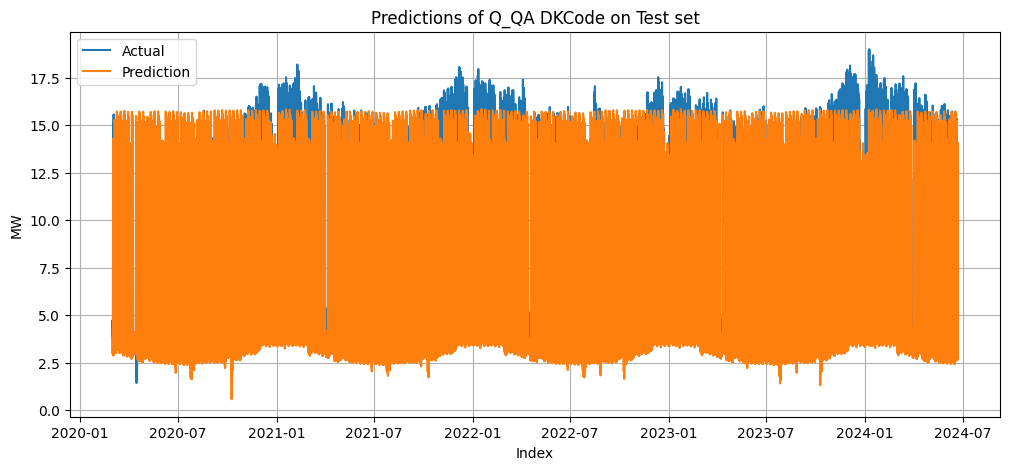

Training RandomForestRegressor model with DKCode:  Q_QB


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 1.6582902815067282
Mean Squared Error (MSE): 3.893245823946937
Root Mean Squared Error (RMSE): 1.9731309697906363
R-squared (R²): 0.7289228015837514
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12   

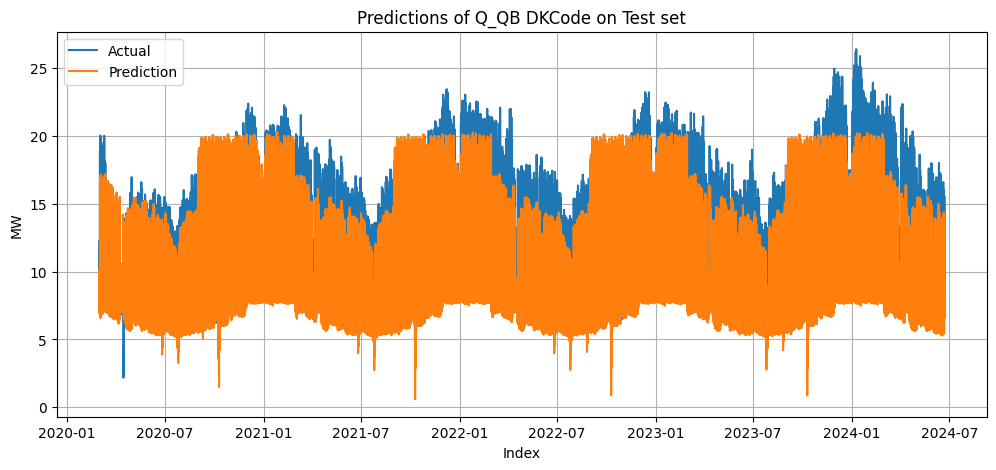

Training RandomForestRegressor model with DKCode:  R_R


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 3.5965128533091195
Mean Squared Error (MSE): 33.08172827093039
Root Mean Squared Error (RMSE): 5.751671780528718
R-squared (R²): 0.6662920722791857
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12    

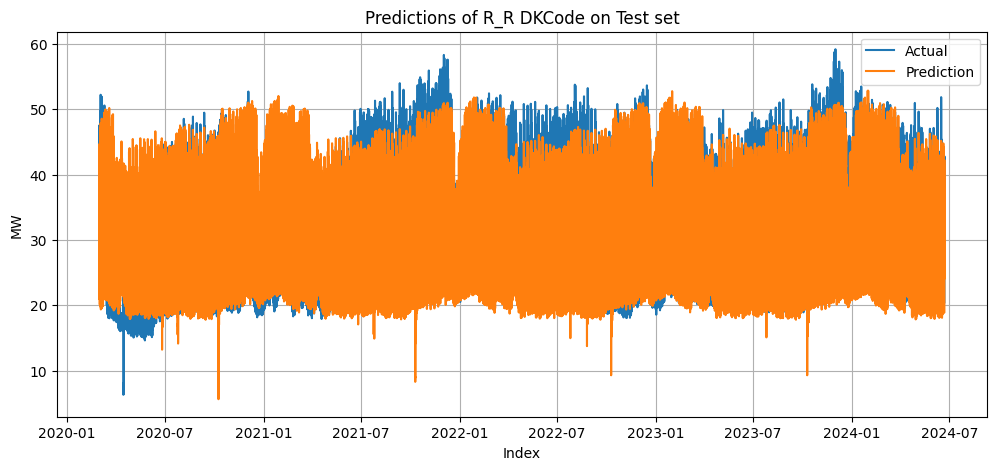

Training RandomForestRegressor model with DKCode:  S_S


/tmp/ipykernel_23/831907902.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/831907902.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])
/tmp/ipykernel_23/831907902.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Absolute Error (MAE): 4.275792395696439
Mean Squared Error (MSE): 27.80549016113816
Root Mean Squared Error (RMSE): 5.273091139088927
R-squared (R²): 0.7628825808262845
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12     

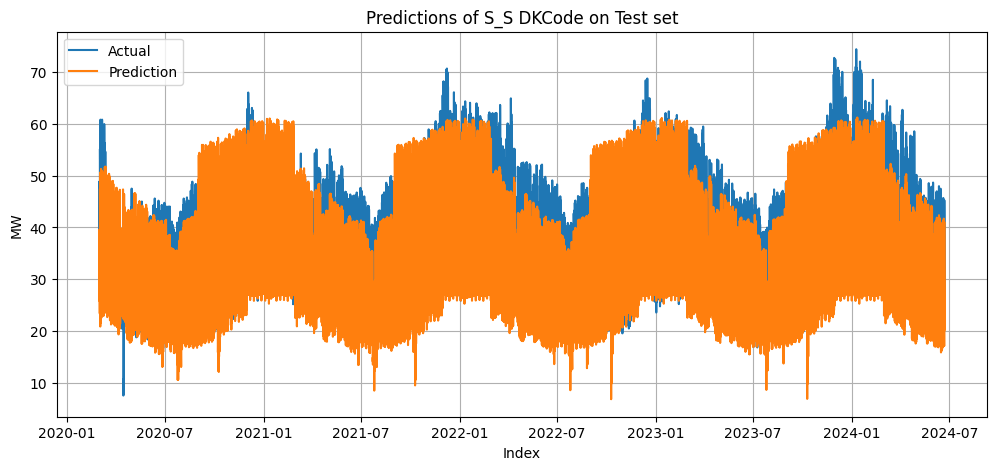

    DK3619Code         MAE           MSE        RMSE        R2
0          A_A   23.351016   1030.270357   32.097825  0.223404
1         C_CA   16.180768    483.625764   21.991493  0.794919
2         C_CC    4.145751     31.750820    5.634787  0.906875
3   C_CE_CF_CD   20.769795    600.029144   24.495492 -1.848957
4         C_CG   12.493241    237.458019   15.409673  0.757789
5         C_CH    7.672061    148.224876   12.174764  0.927192
6         C_CI    0.636252      0.830235    0.911172  0.887733
7         C_CJ    0.712082      1.046096    1.022788  0.934340
8         C_CK    3.967925     34.475809    5.871610  0.928697
9         C_CL    0.811777      1.303506    1.141712  0.906741
10     C_CM_CB    3.290517     18.962848    4.354635  0.932281
11         D_D  146.038319  56804.811866  238.337601 -0.189899
12         E_E   10.367685    201.437188   14.192857  0.325779
13         F_F    8.418836    102.802735   10.139168  0.544099
14         G_G   15.937361    481.617786   21.945792  0

In [7]:
# Create directories if they don't exist
if not os.path.exists("/kaggle/working/Checkpoints_noLag/"):
    os.makedirs("/kaggle/working/Checkpoints_noLag/")
    
if not os.path.exists("/kaggle/working/Prediction_noLag/"):
    os.makedirs("/kaggle/working/Prediction_noLag/")
    
# Initialize an empty DataFrame to store the performance metrics
performance_df = pd.DataFrame(columns=['DK3619Code', 'MAE', 'MSE', 'RMSE', 'R2'])

for i in dkcode_list:
    if os.path.exists("/kaggle/working/Checkpoints_noLag/" + i + "_RandomForestRegressor_model.pkl"):
        continue
    print('Training RandomForestRegressor model with DKCode: ', i)
    df_filter = df[df['DK3619Code'] == i]
    df_corr = df_filter[columns]
    
    #df_corr['lag_24'] = df_corr['lag_24'].fillna(0)

    df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
    df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

    df_corr = df_corr.sort_values(by='HourDK')

    # Split the data
    split_time = pd.Timestamp("2020-02-01")
    df_train, df_temp = split_train_test(df_corr, split_time)
    split_time_valid = pd.Timestamp("2020-03-01")
    df_valid, df_test = split_train_test(df_temp, split_time_valid)
    
    test_time = df_test[['HourDK']]
    
    # Drop datetime columns after splitting
    df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
    df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
    df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

    # Define target and features
    y_train = df_train[['Consumption_MWh']]  # Target variable
    x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

    y_valid = df_valid[['Consumption_MWh']]
    x_valid = df_valid.drop(columns=['Consumption_MWh'])

    y_test = df_test[['Consumption_MWh']]
    x_test = df_test.drop(columns=['Consumption_MWh'])

    # Khởi tạo và fit model
    model = RandomForestRegressor(n_estimators=100, random_state=10)
    model.fit(x_train, y_train)

    # Lưu model
    joblib.dump(model, "/kaggle/working/Checkpoints_noLag/" + i + "_RandomForestRegressor_model.pkl")
    # Load model from file
    model = joblib.load("/kaggle/working/Checkpoints_noLag/" + i + "_RandomForestRegressor_model.pkl")

    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')

    # Append metrics to the performance DataFrame
    performance_df = pd.concat([performance_df, pd.DataFrame({
        'DK3619Code': [i],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'R2': [r2]
    })], ignore_index=True)
    
    print(performance_df)
    
    pred_df = compute_predictions_df(model, x_test, y_test)

    # Merge data into df_corr
    pred_df = pd.merge(test_time, pred_df, left_index=True, right_index=True)
    pred_df = pred_df[['HourDK', 'actual', 'prediction', 'squared_error']]
    
    pred_df.to_csv("/kaggle/working/Prediction_noLag/" + i + "_DF_Prediction.csv", index=False)
    
    plt.figure(figsize=(12, 5))
    start = pred_df['HourDK'].min()
    end = pred_df['HourDK'].max()
    plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
    plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
    plt.title("Predictions of " + i + " DKCode on Test set")
    plt.xlabel('Index')
    plt.ylabel('MW')
    plt.legend()
    plt.grid()
    plt.show()

# Save performance DataFrame to CSV
performance_df.to_csv("/kaggle/working/Performance_Metrics_WithoutLag.csv", index=False)

# Display the performance DataFrame
print(performance_df)